<img src="marketing%20analytics.png" alt="Banner" style="width:100%;height:15%;"/>

# Marketing Campaign Dashboard

## Objective
The objective of this project is to create an interactive and visually appealing dashboard to analyze and visualize the marketing campaign data. The dashboard will provide insights into income distribution, spending patterns, campaign analysis, and key performance indicators (KPIs).

## Table of Contents
1. [Introduction](#introduction)
2. [Data Preprocessing](#data-preprocessing)
3. [Dashboard Features](#dashboard-features)
4. [Key Insights](#key-insights)
5. [Conclusion](#conclusion)

## Introduction
In this project, we aim to analyze the marketing campaign data and create a dynamic dashboard using Python libraries such as Plotly and Dash. The dashboard will help in understanding the customer behavior, spending patterns, and the effectiveness of marketing campaigns.

## Data Preprocessing
Before creating the dashboard, the data needs to be cleaned and preprocessed. The following steps were taken:
- Removed leading and trailing spaces from column names.
- Converted the `Income` column to numeric format.
- Imputed missing income values based on education and marital status.
- Created new variables such as total number of children, age, total spending, and total purchases.
- One-hot encoded categorical variables.

## Dashboard Features
The dashboard includes the following features:
1. **Income Distribution**: Box plot, histogram, and pie chart of income distribution by education.
2. **Spending Analysis**: Bar charts and pie chart for total spending by the number of children and top-performing products.
3. **Campaign Analysis**: Bar chart and pie chart for the country with the highest acceptance of the last campaign, and scatter plot for age vs. last campaign acceptance.
4. **KPIs**: Displaying total customers, average income, and total spending.
5. **Map**: Showing customer distribution by country using a scatter geo plot.
6. **Pivot Table**: Interactive pivot table to analyze data based on education, marital status, or country.

## Key Insights
- **Top-performing products**: Wines, meat products, and gold products are the top-performing products.
- **Income Distribution**: The income distribution varies significantly based on education levels.
- **Spending Patterns**: Customers with more children tend to have higher total spending.
- **Campaign Effectiveness**: The acceptance rate of the last campaign varies by country and age group.

## Conclusion
The Marketing Campaign Dashboard provides valuable insights into customer behavior, spending patterns, and the effectiveness of marketing campaigns. By leveraging interactive visualizations and advanced features, the dashboard helps in making data-driven decisions to improve marketing strategies.

In [ ]:
import pandas as pd

# Load the dataset
data = pd.read_csv('marketing_data.csv')
print(data.head())

In [5]:
# Check column names
print(data.columns)


Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', ' Income ',
       'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Country'],
      dtype='object')


In [20]:
# Check data types of all columns
print(data.dtypes)


ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Response                 int64
Complain                 int64
Country                 object
dtype: object


In [6]:
# Remove leading and trailing spaces from column names
data.columns = data.columns.str.strip()

# Examine variables
print(data[['Dt_Customer', 'Income']].head())


  Dt_Customer       Income
0     6/16/14  $84,835.00 
1     6/15/14  $57,091.00 
2     5/13/14  $67,267.00 
3     5/11/14  $32,474.00 
4      4/8/14  $21,474.00 


In [19]:
# Remove leading and trailing spaces from column names
data.columns = data.columns.str.strip()

# Remove dollar signs and commas, then convert to numeric
data['Income'] = data['Income'].replace(r'[\$,]', '', regex=True).astype(float)

# Impute missing income values
data['Income'] = data.groupby(['Education', 'Marital_Status'])['Income'].transform(lambda x: x.fillna(x.mean()))

# Clean data
data['Education'] = data['Education'].str.strip()
data['Marital_Status'] = data['Marital_Status'].str.strip()


In [21]:
# Total number of children
data['Total_Children'] = data['Kidhome'] + data['Teenhome']

# Age
data['Age'] = 2025 - data['Year_Birth']

# Total spending
data['Total_Spending'] = data[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum(axis=1)

# Total purchases
data['Total_Purchases'] = data[['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']].sum(axis=1)

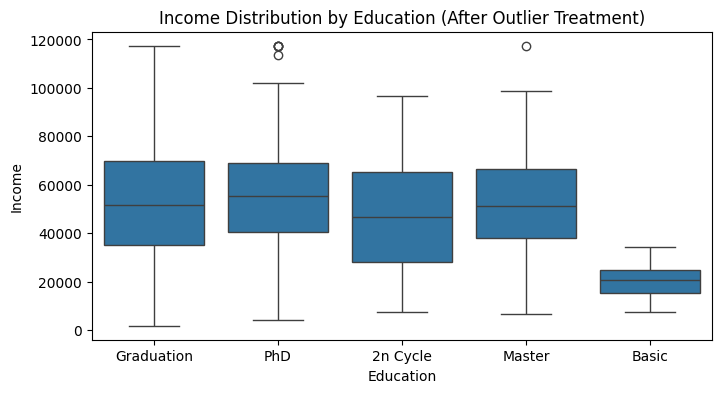

In [27]:
# Identify outliers using the IQR method
Q1 = data['Income'].quantile(0.25)
Q3 = data['Income'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Treat outliers by capping them at the boundaries
data['Income'] = data['Income'].apply(lambda x: lower_bound if x < lower_bound else upper_bound if x > upper_bound else x)

# Verify the treatment
plt.figure(figsize=(8, 4))
sns.boxplot(x='Education', y='Income', data=data)
plt.title('Income Distribution by Education (After Outlier Treatment)')
plt.show()

In [28]:
from sklearn.preprocessing import OneHotEncoder

# One-hot encoding for categorical variables
data = pd.get_dummies(data, columns=['Education', 'Marital_Status'], drop_first=True)


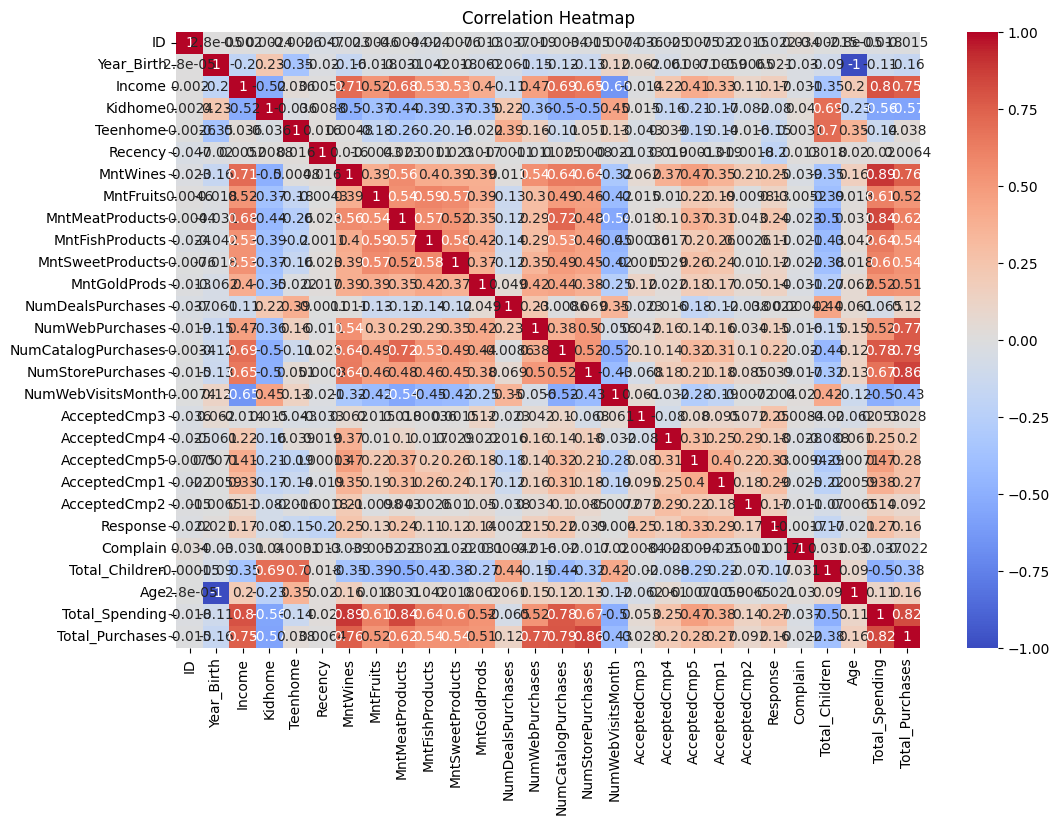

In [34]:
# Filter out non-numeric columns
numeric_data = data.select_dtypes(include=[float, int])

# Generate heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


In [39]:
# Top-performing and low-revenue products
product_columns = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
top_products = data[product_columns].mean().sort_values(ascending=False)
print('Top-performing products:\n', top_products)

# Correlation between age and acceptance rate of the last campaign
correlation, p_val = stats.pearsonr(data['Age'], data['AcceptedCmp5'])
print(f'Correlation between age and last campaign acceptance: correlation={correlation}, p-value={p_val}')

# Country with the highest number of customers who accepted the last campaign
accepted_campaign = data[data['AcceptedCmp5'] == 1]['Country'].value_counts()
print('Country with highest acceptance of last campaign:\n', accepted_campaign)

# Pattern between number of children and total expenditure
correlation, p_val = stats.pearsonr(data['Total_Children'], data['Total_Spending'])
print(f'Correlation between number of children and total expenditure: correlation={correlation}, p-value={p_val}')

# Educational background of customers who lodged complaints
education_columns = [col for col in data.columns if 'Education_' in col]
complaints_education = data[data['Complain'] == 1][education_columns].sum()
print('Educational background of customers who lodged complaints:\n', complaints_education)

Top-performing products:
 MntWines            303.935714
MntMeatProducts     166.950000
MntGoldProds         44.021875
MntFishProducts      37.525446
MntSweetProducts     27.062946
MntFruits            26.302232
dtype: float64
Correlation between age and last campaign acceptance: correlation=-0.007122541535987502, p-value=0.7361799952148979
Country with highest acceptance of last campaign:
 Country
SP     89
CA     21
SA     21
AUS    13
GER     8
IND     6
US      5
Name: count, dtype: int64
Correlation between number of children and total expenditure: correlation=-0.4988876486808995, p-value=2.7628809056051445e-141
Educational background of customers who lodged complaints:
 Education_Basic          0
Education_Graduation    14
Education_Master         2
Education_PhD            1
dtype: int64


In [3]:
import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output
import plotly.express as px
import plotly.graph_objects as go
import pandas as pd

# Load your dataset
data = pd.read_csv('marketing_data.csv')

# Clean and preprocess the data as we did earlier
data.columns = data.columns.str.strip()
data['Income'] = data['Income'].replace(r'[\$,]', '', regex=True).astype(float)
data['Income'] = data.groupby(['Education', 'Marital_Status'])['Income'].transform(lambda x: x.fillna(x.mean()))
data['Education'] = data['Education'].str.strip()
data['Marital_Status'] = data['Marital_Status'].str.strip()
data['Total_Children'] = data['Kidhome'] + data['Teenhome']
data['Age'] = 2025 - data['Year_Birth']
data['Total_Spending'] = data[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum(axis=1)
data['Total_Purchases'] = data[['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']].sum(axis=1)
data = pd.get_dummies(data, columns=['Education', 'Marital_Status'], drop_first=True)

# Define product columns
product_columns = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

# Initialize the Dash app
app = dash.Dash(__name__)

# Define the layout of the dashboard
app.layout = html.Div([
    html.H1("Marketing Campaign Dashboard", style={'text-align': 'center'}),
    dcc.Tabs([
        dcc.Tab(label='Income Distribution', children=[
            dcc.Graph(
                id='income-boxplot',
                figure=px.box(data, x='Education_Graduation', y='Income', title='Income Distribution by Education (Graduation)')
            ),
            dcc.Graph(
                id='income-histogram',
                figure=px.histogram(data, x='Income', nbins=30, title='Income Distribution')
            ),
            dcc.Graph(
                id='income-pie',
                figure=px.pie(data, names='Education_Graduation', values='Income', title='Income Distribution by Education (Pie Chart)')
            )
        ]),
        dcc.Tab(label='Spending Analysis', children=[
            dcc.Graph(
                id='spending-bar',
                figure=px.bar(data, x='Total_Children', y='Total_Spending', title='Total Spending by Number of Children')
            ),
            dcc.Graph(
                id='top-products',
                figure=px.bar(data[product_columns].mean().sort_values(ascending=False).reset_index(), 
                              x='index', y=0, title='Top-Performing Products')
            ),
            dcc.Graph(
                id='spending-pie',
                figure=px.pie(data, names='Total_Children', values='Total_Spending', title='Total Spending by Number of Children (Pie Chart)')
            )
        ]),
        dcc.Tab(label='Campaign Analysis', children=[
            dcc.Graph(
                id='campaign-acceptance',
                figure=px.bar(data[data['AcceptedCmp5'] == 1]['Country'].value_counts().reset_index(), 
                              x='Country', y='count', title='Country with Highest Acceptance of Last Campaign')
            ),
            dcc.Graph(
                id='age-campaign',
                figure=px.scatter(data, x='Age', y='AcceptedCmp5', title='Age vs Last Campaign Acceptance')
            ),
            dcc.Graph(
                id='campaign-pie',
                figure=px.pie(data[data['AcceptedCmp5'] == 1], names='Country', title='Country with Highest Acceptance of Last Campaign (Pie Chart)')
            )
        ]),
        dcc.Tab(label='KPIs', children=[
            html.Div([
                html.H3("Key Performance Indicators", style={'text-align': 'center'}),
                html.Div([
                    html.Div([
                        html.H4("Total Customers"),
                        html.P(f"{data['ID'].nunique()}")
                    ], className='kpi-box'),
                    html.Div([
                        html.H4("Average Income"),
                        html.P(f"${data['Income'].mean():,.2f}")
                    ], className='kpi-box'),
                    html.Div([
                        html.H4("Total Spending"),
                        html.P(f"${data['Total_Spending'].sum():,.2f}")
                    ], className='kpi-box')
                ], className='kpi-container')
            ])
        ]),
        dcc.Tab(label='Map', children=[
            dcc.Graph(
                id='customer-map',
                figure=px.scatter_geo(data, locations='Country', locationmode='country names', 
                                      size='Total_Spending', title='Customer Distribution by Country')
            )
        ]),
        dcc.Tab(label='Pivot Table', children=[
            html.Div([
                html.H3("Pivot Table", style={'text-align': 'center'}),
                dcc.Dropdown(
                    id='pivot-dropdown',
                    options=[
                        {'label': 'Education', 'value': 'Education'},
                        {'label': 'Marital Status', 'value': 'Marital_Status'},
                        {'label': 'Country', 'value': 'Country'}
                    ],
                    value='Education'
                ),
                dcc.Graph(id='pivot-table')
            ])
        ])
    ])
])

# Define callback for pivot table
@app.callback(
    Output('pivot-table', 'figure'),
    [Input('pivot-dropdown', 'value')]
)
def update_pivot_table(selected_value):
    if selected_value == 'Education':
        pivot_data = data.groupby(['Education_Graduation', 'Education_Master', 'Education_PhD']).agg({'Income': 'mean', 'Total_Spending': 'sum'}).reset_index()
    elif selected_value == 'Marital_Status':
        pivot_data = data.groupby(['Marital_Status_Alone', 'Marital_Status_Divorced', 'Marital_Status_Married', 'Marital_Status_Single', 'Marital_Status_Together', 'Marital_Status_Widow']).agg({'Income': 'mean', 'Total_Spending': 'sum'}).reset_index()
    else:
        pivot_data = data.groupby('Country').agg({'Income': 'mean', 'Total_Spending': 'sum'}).reset_index()
    
    fig = go.Figure(data=[go.Table(
        header=dict(values=list(pivot_data.columns),
                    fill_color='paleturquoise',
                    align='left'),
        cells=dict(values=[pivot_data[col] for col in pivot_data.columns],
                   fill_color='lavender',
                   align='left'))
    ])
    return fig

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True)
